### If usingColabs

In [2]:
from getpass import getpass
import os

user = "OliverJBoom"
password = getpass('github password')

os.environ['GITHUB_AUTH'] = user + ':' + password
os.chdir("/content")
!rm -rf "/content/acse-9-independent-research-project-OliverJBoom"
!git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-9-independent-research-project-OliverJBoom.git
os.chdir("acse-9-independent-research-project-OliverJBoom/Forecaster")

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)
path = "/content/gdrive/My Drive/Chai/Data"

### Ensuring Correct Directory

In [1]:
import os
if "Foresight" in os.listdir():
    print("In correct directory")
elif "Foresight" in os.listdir("../"):
    print("Moving up a layer")
    os.chdir("../")
else:
    print("Have a deeper look at where the notebook is situated"
         "relative to the python files")

Moving up a layer


## Loading Packages

In [2]:
from Foresight import *
set_seed(42)

True

### Insuring that training is done on GPU if available

In [3]:
device = 'cpu'

if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
    
    if torch.cuda.device_count() > 1:
        print("Parallel Available")
        parallel=True
        
    else:
        parallel=False
        
else:
    print("No GPU available!")
    parallel=False

No GPU available!


## Loading Data

In [4]:
# Custom dataset if desired
# custom_list=["cu_lme", "al_lme"]

path = "Data/"
universe_dict = universe_select(path, "Cu", custom_list=None)
use_lg_returns = False
use_PCA = False
autoregressive = False
saving = False
loading = False
feat_spawn = False

## Preprocessing

In [5]:
# Renaming the columns to price
universe_dict = price_rename(universe_dict)

# Cleaning the dataset of any erroneous datapoints
universe_dict = clean_dict_gen(universe_dict)

# Making sure that all the points in the window have consistent length
universe_dict = truncate_window_length(universe_dict)

# Generating the dataset
if use_lg_returns:
    # Lg Returns Only
    df_full = generate_dataset(universe_dict, lg_only=True, price_only=False)
    target_col = "cu_lme"

else:
    # Price Only
    df_full = generate_dataset(universe_dict, lg_only=False, price_only=True)
    target_col = "price_cu_lme"
    
if autoregressive:
    df_full = df_full[[target_col]]
    
if feat_spawn:
    df_full = feature_spawn(df_full)

Included Instrument:
cu_shfe
cu_lme
cu_comex_p
cu_comex_s
peso
sol
bdi
ted
vix
skew
gsci


### Visualise the dataset

In [6]:
df_full.head(5)
# df_full.tail(5)
# Visualise the plots if desired
# visualise_df(df_full)

,price_cu_shfe,price_cu_lme,price_cu_comex_p,price_cu_comex_s,price_peso,price_sol,price_bdi,price_ted,price_vix,price_skew,price_gsci
date,,,,,,,,,,,
2006-09-13,69540.0,7484.5,3.3925,15748.0,537.35,3.2530,4129.0,4.901,11.18,120.44,438.38855
2006-09-14,71350.0,7439.0,3.3820,14180.0,537.73,3.2475,4207.0,4.926,11.55,119.47,433.72522
2006-09-15,69400.0,7281.0,3.3165,14775.0,537.10,3.2480,4258.0,4.939,11.76,135.25,431.58291
2006-09-18,69830.0,7459.0,3.4180,15263.0,537.10,3.2450,4279.0,4.949,11.78,127.35,434.97293
2006-09-19,71470.0,7516.0,3.3755,17523.0,537.10,3.2450,4275.0,4.948,11.98,125.03,426.51240


### Normalizing the dataset

data_X  (3282, 66, 11) 
data_y (3282, 1)
Epoch: 0 Train: 4.67454 Val: 1.83870  Time: 3.109  Best Val: 1.83870


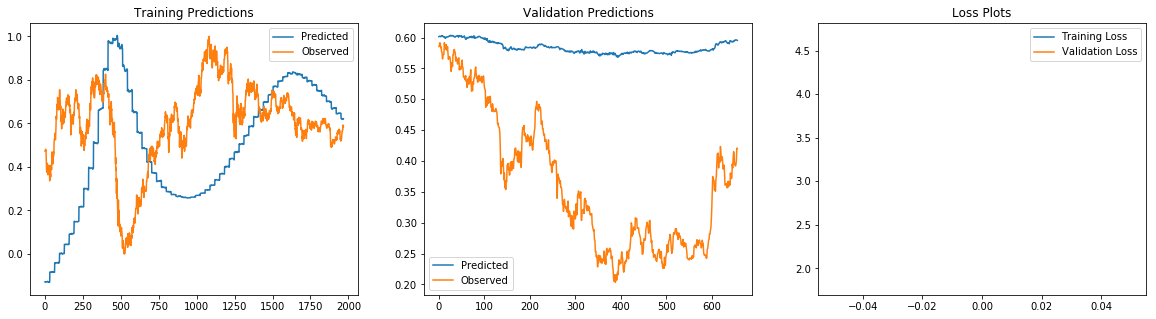

Epoch: 50 Train: 0.25053 Val: 0.70380  Time: 147.454  Best Val: 0.02564


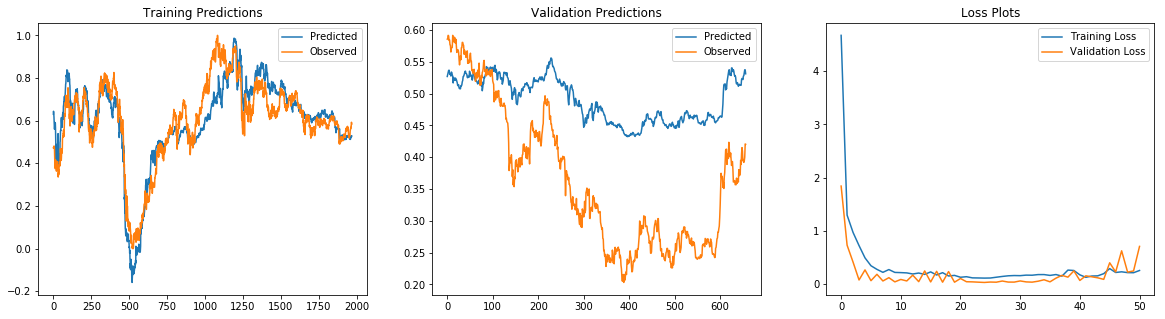

Early Stopping
Multivariate_FSpawn_F5


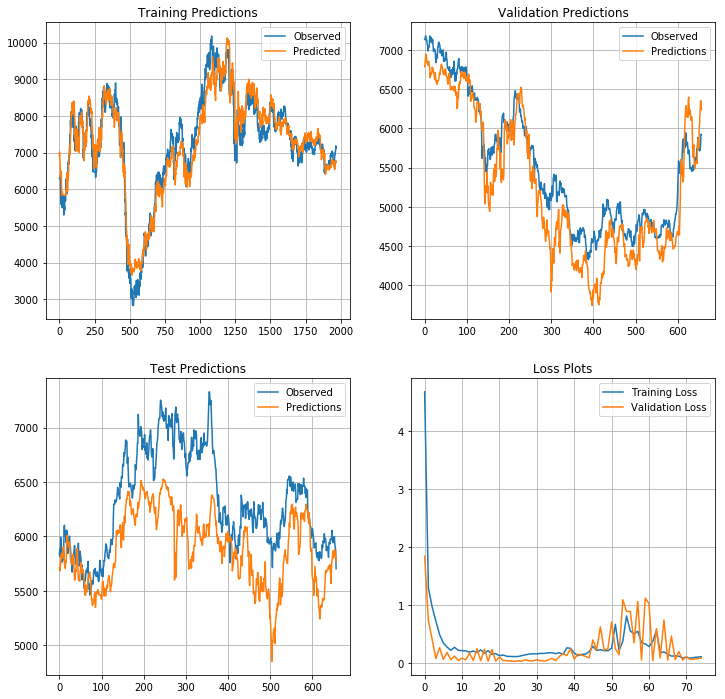

Price Metrics:  270506.9881500058 437.11576581053447 0.45426829268292684


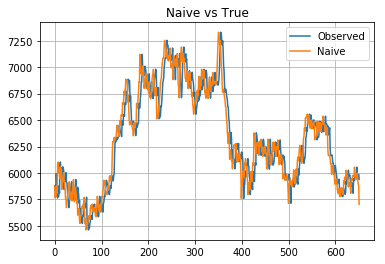

naive 21892.758 116.06173 0.47465437788018433
For Mean Squared Error:
Naive Wins
For Mean Absolute Error:
Naive Wins
For Mean Directional Accuracy:
Naive Wins
data_X  (3216, 132, 11) 
data_y (3216, 1)
Epoch: 0 Train: 4.44251 Val: 0.94578  Time: 8.692  Best Val: 0.94578


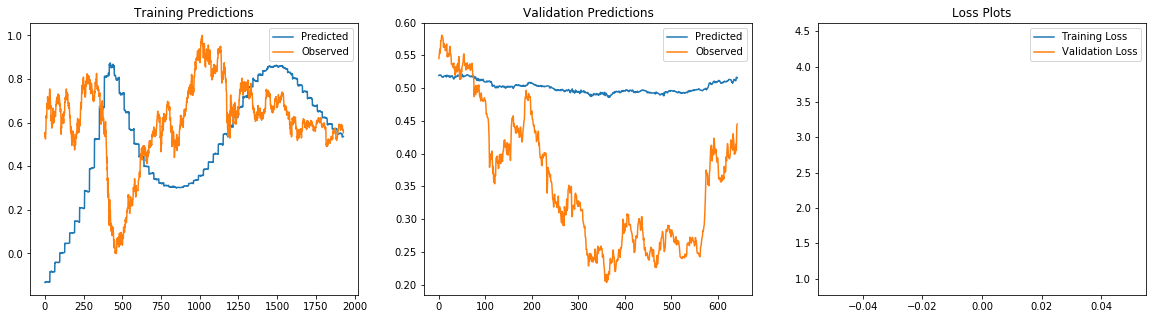

Epoch: 50 Train: 0.15872 Val: 0.15039  Time: 232.149  Best Val: 0.02909


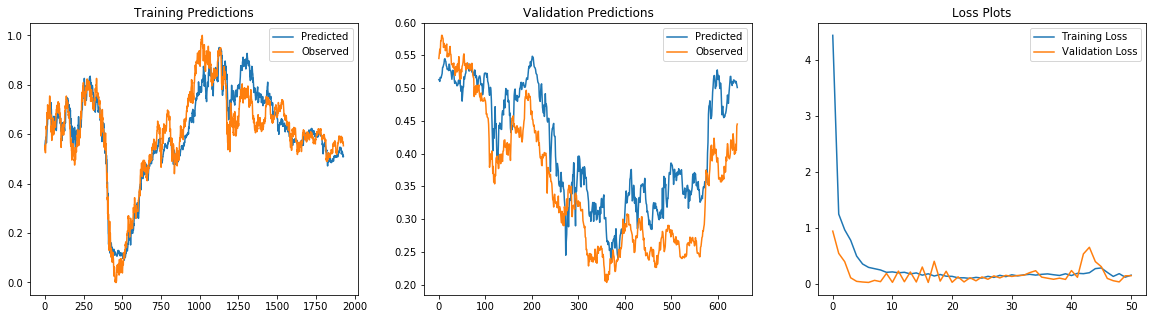

Early Stopping
Multivariate_FSpawn_F5


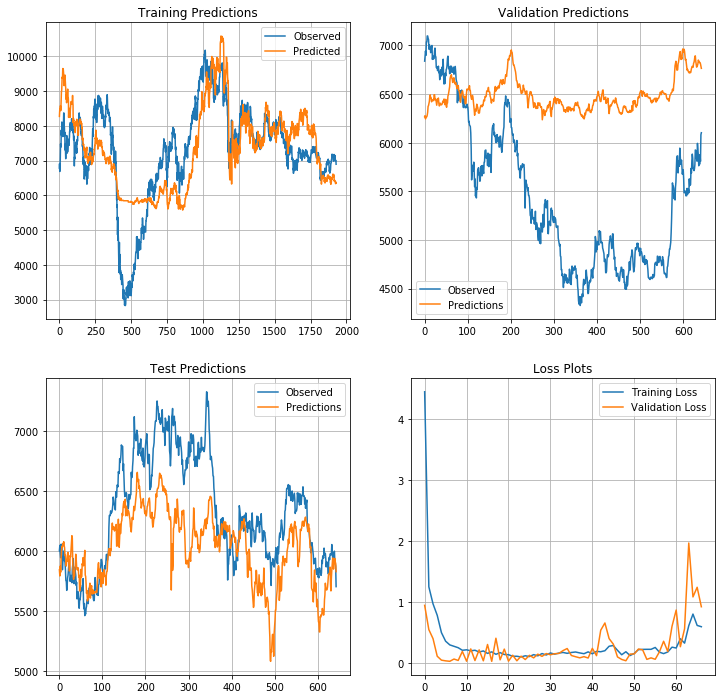

Price Metrics:  188958.16355512803 350.9003098856264 0.46967340590979784


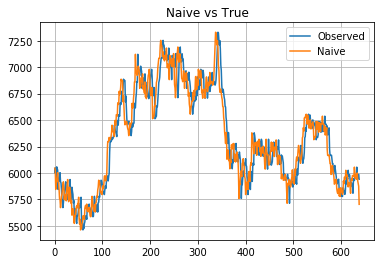

naive 21753.918 115.52818 0.47335423197492166
For Mean Squared Error:
Naive Wins
For Mean Absolute Error:
Naive Wins
For Mean Directional Accuracy:
Naive Wins
data_X  (3155, 66, 11) 
data_y (3155, 1)
Epoch: 0 Train: 3.94829 Val: 1.16596  Time: 2.341  Best Val: 1.16596


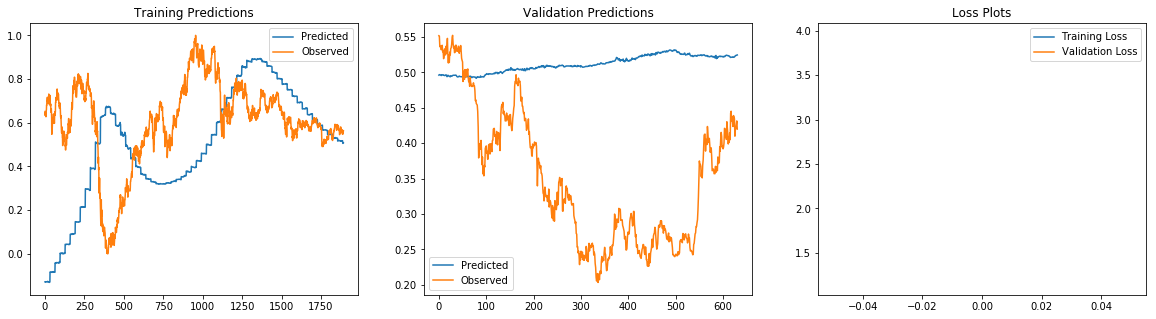

Epoch: 50 Train: 0.51705 Val: 2.77012  Time: 117.645  Best Val: 0.92921


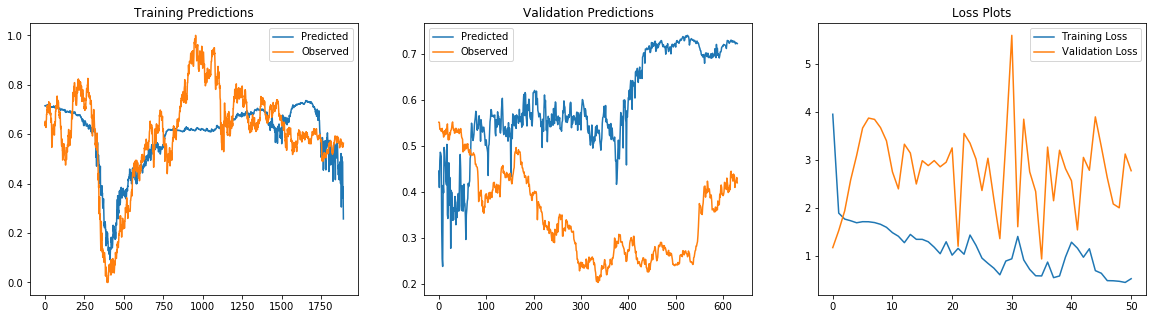

Early Stopping
Multivariate_FSpawn_F132


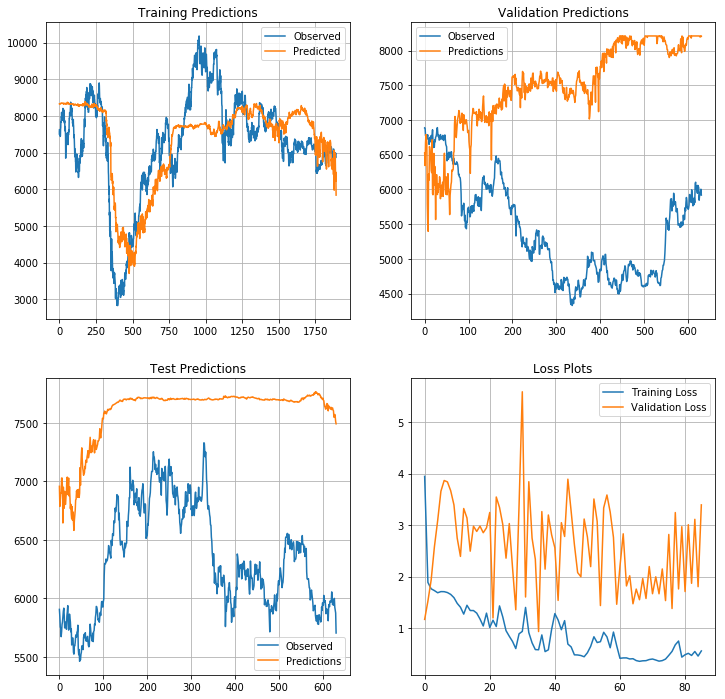

Price Metrics:  1751390.4803814373 1267.141407566289 0.4650793650793651


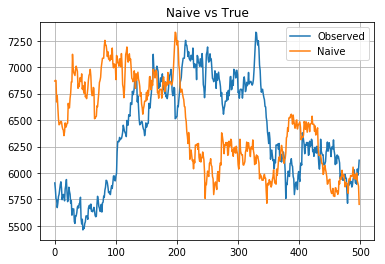

naive 488931.44 567.9013 0.45582329317269077
For Mean Squared Error:
Naive Wins
For Mean Absolute Error:
Naive Wins
For Mean Directional Accuracy:
LSTM Wins
data_X  (3089, 132, 11) 
data_y (3089, 1)
Epoch: 0 Train: 3.11401 Val: 1.65440  Time: 4.063  Best Val: 1.65440


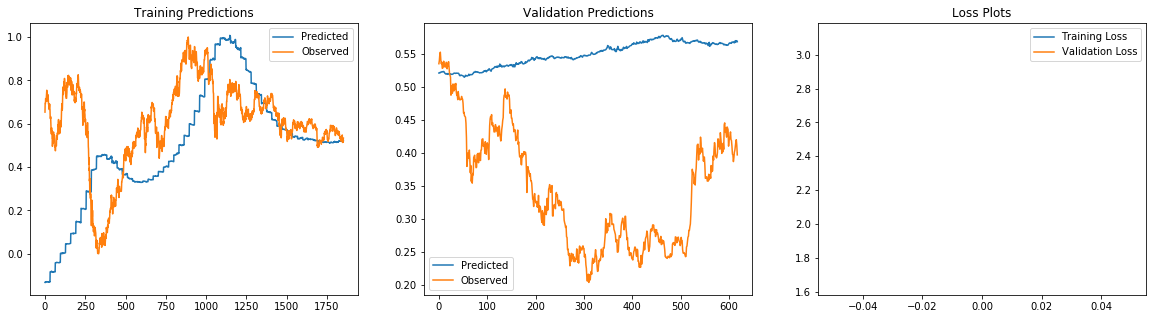

Epoch: 50 Train: 0.42288 Val: 2.58300  Time: 238.214  Best Val: 1.03715


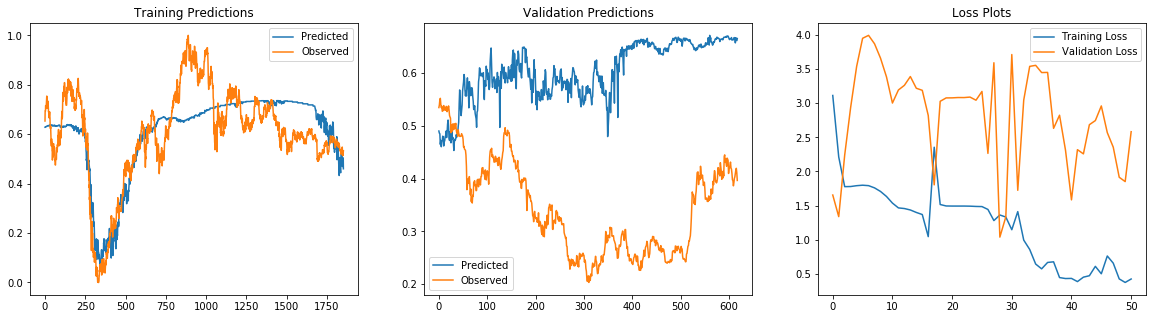

Early Stopping
Multivariate_FSpawn_F132


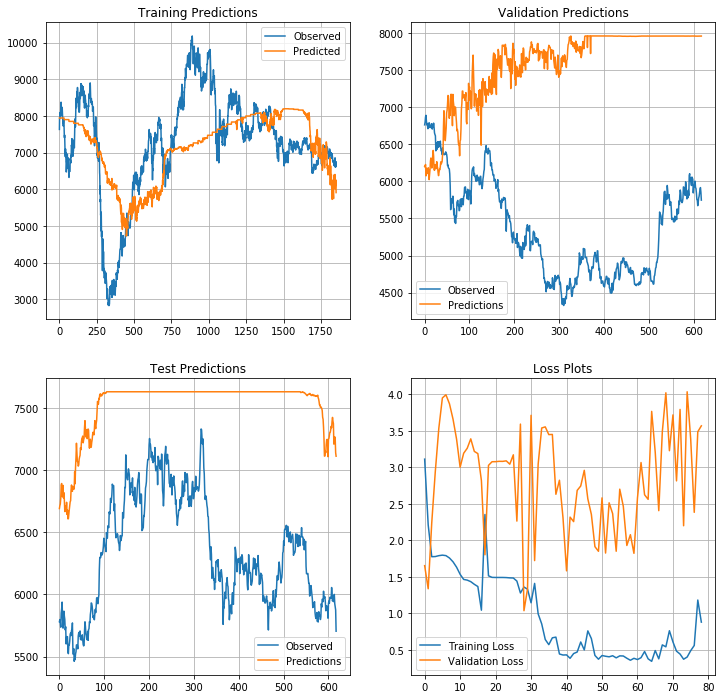

Price Metrics:  1538614.8225807215 1184.086623613984 0.1685575364667747


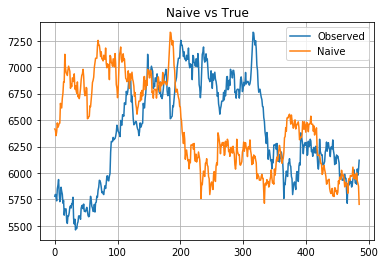

naive 483608.5 561.50104 0.4536082474226804
For Mean Squared Error:
Naive Wins
For Mean Absolute Error:
Naive Wins
For Mean Directional Accuracy:
Naive Wins


In [8]:
# forecast_length = 132

for forecast_length in [5, 132]:
    for series_length in [66, 132]:
        # Data scaling
        scaler_data_X = MinMaxScaler()
        scaler_data_y = MinMaxScaler()

        df_target = df_full[[target_col]]

        data_X = scaler_data_X.fit_transform(df_full)[:-forecast_length, :]
        # Need to have an independent scaler for inverse_transforming later
        data_y = scaler_data_y.fit_transform(df_target)

        # Offset target one forecast length
        data_y = data_y[forecast_length:, :]

        # Reducing the dataset to containing a threshold amount of variance
        if use_PCA:
            n_dim = dimension_selector(data_X, thresh=0.95)
            data_X = dimension_reduce(data_X, n_dim)

        # The input size of each time series window

        data_X, data_y = slice_series(data_X, data_y, series_length, dataset_pct=1.0)

        # Hyperparameters
        learning_rate = 1e-2
        momentum = 0.5
        weight_decay = 0

        # Batch Parameters
        batch_size = 32

        # Training Parameters
        n_epochs = 200
        patience = 50
        disp_freq= 50
        fig_disp_freq= 50


        # Model Parameters
        num_features = data_X.shape[2]
        hidden_dim = 8
        dense_hidden = 32
        num_layers = 1
        output_dim = 1
        dropout = 0.0

        model = LSTM(num_features=num_features, 
                     hidden_dim=hidden_dim,
                     dense_hidden=dense_hidden,
                     series_length = series_length,
                     batch_size=batch_size,
                     output_dim=output_dim, 
                     num_layers=num_layers, 
                     device=device,
                     dropout=dropout)

        if parallel:
            model = nn.DataParallel(model)
            print("Parallel Workflow\n")

        model.to(device)

        print('data_X ', data_X.shape, '\ndata_y', data_y.shape)

        optimiser = torch.optim.Adam(model.parameters(), learning_rate)

        learning = DeepLearning(model=model, 
                                data_X=data_X, 
                                data_y=data_y, 
                                n_epochs=n_epochs,
                                optimiser=optimiser,
                                batch_size=batch_size,
                                debug=False, 
                                disp_freq=disp_freq,
                                fig_disp_freq=fig_disp_freq, 
                                device=device,
                                patience=patience, 
                                scaler_data_X=scaler_data_X, 
                                scaler_data_y=scaler_data_y)

        # Splitting the data into the train, validation and test sets
        learning.train_val_test()
        learning.training_wrapper()
        learning.evaluate(learning.best_model, learning.test_loader)

        model_name = "Multivariate_FSpawn_F" + str(forecast_length) 
        print(model_name)

        if saving:
            print("Saving")
            # Saving Pickle
            pickle.dump(learning, open("Results/Pickles/Multivariate/" + model_name, 'wb'))
            # Saving Model Pth
            model_save(model, model_name, path="Results/Pths/Multivariate/")

        # Observed
        train_true = learning.scaler_data_y.inverse_transform(learning.y_train.numpy())
        val_true  = learning.scaler_data_y.inverse_transform(learning.y_val.numpy())
        test_true  = learning.scaler_data_y.inverse_transform(learning.y_test.numpy())

        # Predicted
        train_pred = learning.scaler_data_y.inverse_transform(np.array(learning.train_predictions))
        val_pred  = learning.scaler_data_y.inverse_transform(np.array(learning.val_predictions))
        test_pred = learning.scaler_data_y.inverse_transform(np.array(learning.test_predictions))

        # Rescaling Example
        fig, ax = plt.subplots(2, 2, figsize=(12, 12))

        ax[0, 0].set_title("Training Predictions")
        ax[0, 0].plot(train_true, label="Observed")
        ax[0, 0].plot(train_pred, label="Predicted")
        ax[0, 0].grid()
        ax[0, 0].legend()

        ax[0, 1].grid()
        ax[0, 1].set_title("Validation Predictions")
        ax[0, 1].plot(val_true, label="Observed")
        ax[0, 1].plot(val_pred, label="Predictions")
        ax[0, 1].legend()

        ax[1, 0].grid()
        ax[1, 0].set_title("Test Predictions")
        ax[1, 0].plot(test_true, label="Observed")
        ax[1, 0].plot(test_pred, label="Predictions")
        ax[1, 0].legend()

        ax[1, 1].grid()
        ax[1, 1].set_title("Loss Plots")
        ax[1, 1].plot(learning.logs['Training Loss'], label="Training Loss")
        ax[1, 1].plot(learning.logs['Validation Loss'], label="Validation Loss")
        ax[1, 1].legend()

        epoch_reached = str(len(learning.logs['Training Loss']))
        path = "Results/Plots/"
        val_loss = learning.best_val_score

        plt.show()

        mse, mae, mda = evaluate(test_pred, test_true, log_ret=False)
        print("Price Metrics: ", 
              mse, mae, mda)

        naive_pred = test_true[forecast_length:]

        plt.plot(test_true[:-forecast_length] ,label="Observed")
        plt.plot(naive_pred,label="Naive")
        plt.title("Naive vs True")
        plt.grid()
        plt.legend()
        plt.show()

        mse_naive, mae_naive, mda_naive = evaluate(naive_pred, test_true[:-forecast_length], log_ret=False)
        print("naive", mse_naive, mae_naive, mda_naive)


        print("For Mean Squared Error:")

        if mse_naive < mse:
            print("Naive Wins")
        else:
            print("LSTM Wins")

        print("For Mean Absolute Error:")

        if mae_naive < mae:
            print("Naive Wins")
        else:
            print("LSTM Wins")

        print("For Mean Directional Accuracy:")

        if mda_naive > mda:
            print("Naive Wins")
        else:
            print("LSTM Wins")